## 🔮 Deep Learning in Practice


<img src="https://i.imgur.com/4RUm91Y.png">

<table>
  <tr> <th>torch</th> <th>torch.nn</th> <th>torch.nn.functional</th> <th>torch.optim</th> <th>torch.utils</th> </tr>
  <tr> 
  <td> Wraps all other modules and offers tensor functionality on GPU and automatic differentiation </td> 
  <td> Basic blocks of neural networks (i.e., layers, activations and loss functions) </td> 
  <td> Stateless functional version of (torch.nn) </td> 
  <td> Optimization algorithms and learning rate schedulers</td> 
  <td> reading data, batching, logging, etc. </td> </tr>
</table>


We're done with `torch` and `torch.utils` and `torch.optm`. Let's have a look at `torch.nn`.

`torch.nn` helps us accomplish the first two steps of the "deep learning framework":

1. Define the hypothesis function $f(x;θ)$ (i.e., the model architecture)
2. Define the loss function $J(y, f(x;θ))$



<img src="https://miro.medium.com/v2/resize:fit:1047/1*wzrXts0Xfm5xBls14Dd7qg.png" width="600"/>

For (1), it makes the following assumption:

- We can model $f(x;θ)$ via a sequence of operations

  - Have seen in the last lab that it holds for feedforward neural networks (i.e., forward loop)

  - Holds generally for any deep learning model: but some operations may have multiple inputs or outputs

**Abstraction:** Model each of such operations as a layer
  - From the lab, we already know that any "diagrammatic" layer (except input) in a feedforward neural network is an operation $f(Wa+b)$
  - Holds for other deep learning network as well

**Let's implement the layer corresponding to $Z = Wa+b$:**

In [1]:
import torch


class SimpleLinearLayer:
    def __init__(self, input_size, layer_dim):
        # Initialize weights
        self.weight = torch.randn(layer_dim, input_size)      # W
        self.bias = torch.randn(layer_dim)                    # b

    def forward(self, x):
        z = x @ self.weight.T + self.bias                       # [1,n]*[n,nl] → [1,nl]
        return z

# 1. Define the layer
simple_linear_layer = SimpleLinearLayer(10, 5)

# 2. Use the layer
output = simple_linear_layer.forward(torch.rand(1, 10))
output

tensor([[-2.2595,  0.4812,  1.4469,  1.8259,  0.4893]])

If we make multiple instances of this and call one after another we effectively realize a neural network, right? 

This is the scheme in which PyTorch implements operations (along with their parameters). In PyTorch, the layer we defined above is simply called `LinearLayer`. 

In [3]:
import torch
import torch.nn as nn

# 1. Define the layer
pytorch_linear_layer = nn.Linear(10, 5)

# 2. Use the layer
output = pytorch_linear_layer(torch.rand(1, 10))    # Notice: didn't have to call forward explictly

print(pytorch_linear_layer.weight.shape)
output

torch.Size([5, 10])


tensor([[ 0.0712, -0.2671,  0.2182, -0.0697,  0.2166]],
       grad_fn=<AddmmBackward0>)

In [4]:
# CNN Bulding Block is convolutional later
conv_layer = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3)
output = conv_layer(torch.rand(1, 3, 32, 32))  # (batch, channels, height, width)
print("Convolutional Layer Weights", conv_layer.weight.shape)

# Pooling Layer is another building block of CNNs
pool_layer = nn.MaxPool2d(kernel_size=2, stride=2)
output = pool_layer(torch.rand(1, 3, 32, 32))  # (batch, channels, height, width)
print("Pooling Layer Output Shape", output.shape)

## RNN Building Block
rnn_layer = nn.RNN(input_size=10, hidden_size=20, num_layers=2, batch_first=True)
output, hn = rnn_layer(torch.rand(5, 8, 10))         # (batch, seq_len, input_size)
print("RNN Layer Weights", rnn_layer.weight_ih_l0.shape, rnn_layer.weight_hh_l0.shape)

## Batch Normalization layer to accelerate training
batchnorm_layer = nn.BatchNorm1d(num_features=10)
output = batchnorm_layer(torch.rand(5, 10))
print(batchnorm_layer.weight.shape)

## Dropout layer to prevent overfitting
dropout_layer = nn.Dropout(p=0.5)
output = dropout_layer(torch.rand(1, 10))
print("Dropout layer output", output)

Convolutional Layer Weights torch.Size([16, 3, 3, 3])
Pooling Layer Output Shape torch.Size([1, 3, 16, 16])
RNN Layer Weights torch.Size([20, 10]) torch.Size([20, 20])
torch.Size([10])
Dropout layer output tensor([[0.0000, 1.1040, 0.3248, 0.1436, 0.0000, 0.7156, 0.0000, 0.0000, 0.0000,
         0.0000]])


#### Now let's look at activations:

The `torch.nn` also supports a large class of activation functions which are also treated like layers

In [5]:
# 1. Define the layer
relu_layer = nn.LeakyReLU(negative_slope=0.00)
sigmoid_layer = nn.Sigmoid()
tanh_layer = nn.Tanh()
softmax_layer = nn.Softmax(dim=1)

# 2. Use the layer
relu_output = relu_layer(torch.randn(1, 10))

# Let's consider a nonlinear layer:
output = relu_layer(pytorch_linear_layer(torch.rand(1, 10)))
output

tensor([[-0.0000, -0.0000, -0.0000, 0.1347, 0.1531]],
       grad_fn=<LeakyReluBackward0>)

As well as loss functions!

In [32]:
import torch
import torch.nn as nn

y = torch.tensor([0, 1, 1, 0])                      # Binary labels
ŷ  = torch.tensor([0.2, 0.7, 0.9, 0.3])             # Predicted probabilities for the positive class

# 1. Define the BCELoss criterion
criterion = nn.BCELoss()

# 2. Compute the loss
loss = criterion(ŷ, y.float())

print("Binary Cross-Entropy Loss:", loss.item())

Binary Cross-Entropy Loss: 0.26046350598335266


In [33]:
import torch
import torch.nn as nn

# 1. Define the MSELoss criterion
criterion = nn.MSELoss()

# 2. Compute the loss
y = torch.tensor([0.5, 0.4, 0.9, 0.1])  # True values
ŷ  = torch.tensor([0.6, 0.3, 0.8, 0.2])  # Predicted values

loss = criterion(ŷ, y)

print("Mean Squared Error Loss:", loss.item())

Mean Squared Error Loss: 0.009999999776482582


For a list of layers, activations, losses, etc. supported by the module, [let's check out this](https://pytorch.org/docs/stable/nn.html).

Now we know how to build a neural network:

1. Define the layers of the neural network 

2. Call the defines instances one by one to pass an input to the network

Since each of these layers has its own parameters, we need to keep track of each for optimization. PyTorch can keep track of them for us by simply defining the class of our model while inheriting from `torch.nn.module`.

### Revisit Logistic Regression

#### 1. Define the model

In [6]:
import torch
import torch.nn as nn
import numpy as np

class LogisticRegression(nn.Module):
    def __init__(self, shallow=True):
        super(LogisticRegression, self).__init__()
        self.shallow = shallow
        self.l1 = nn.Linear(2, 1) if shallow else nn.Linear(2, 1000) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(1000, 1)
        
        self.sigmoid = nn.Sigmoid()

        # Loss function
        self.criterion = nn.BCELoss()
        
        # Optimizer
        self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)

    def forward(self, x):
        if self.shallow:
            a = self.l1(x)
            a = self.sigmoid(a)
        else:
            a = self.l1(x)
            a = self.relu(a)
            a = self.l2(a)
            a = self.sigmoid(a)
        return a

Notice the free parameters tracking:

In [7]:
model = LogisticRegression()
for param in model.parameters():    print(param.shape)

torch.Size([1, 2])
torch.Size([1])
torch.Size([1, 1000])
torch.Size([1])


#### Define train and predict functions

In [8]:
AddToClass = lambda func: setattr(LogisticRegression, func.__name__, func) or func

@AddToClass
def fit(self, x_train, y_train, num_epochs=100):
    x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

    for epoch in range(num_epochs):
        # 1. Forward pass
        outputs = self.forward(x_train_tensor)
        # 2. Compute the loss
        loss = self.criterion(outputs, y_train_tensor)
        # 3. Compute the gradients
        loss.backward()
        # 4. Update the weights
        self.optimizer.step()
        # 5. Zero the gradients
        self.optimizer.zero_grad()

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

@AddToClass
def predict(self, x_val):
    x_val_tensor = torch.tensor(x_val, dtype=torch.float32)
    with torch.no_grad():
        predicted_probs = self.forward(x_val_tensor)
        predicted_labels = (predicted_probs > 0.5).float()
    return predicted_labels.cpu().numpy()

Begin training

In [9]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# Generate synthetic dataset using make_blobs
X, y = make_circles(n_samples=700, noise=0.1, factor=0.5, random_state=42)

# Split the dataset into train and test sets
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Fit-Predict Pipeline
lr = LogisticRegression(shallow=False)
lr.fit(x_train, y_train, num_epochs=300)

Epoch [10/300], Loss: 0.6962
Epoch [20/300], Loss: 0.6770
Epoch [30/300], Loss: 0.6591
Epoch [40/300], Loss: 0.6421
Epoch [50/300], Loss: 0.6260
Epoch [60/300], Loss: 0.6105
Epoch [70/300], Loss: 0.5957
Epoch [80/300], Loss: 0.5816
Epoch [90/300], Loss: 0.5680
Epoch [100/300], Loss: 0.5549
Epoch [110/300], Loss: 0.5424
Epoch [120/300], Loss: 0.5304
Epoch [130/300], Loss: 0.5189
Epoch [140/300], Loss: 0.5078
Epoch [150/300], Loss: 0.4972
Epoch [160/300], Loss: 0.4870
Epoch [170/300], Loss: 0.4771
Epoch [180/300], Loss: 0.4677
Epoch [190/300], Loss: 0.4586
Epoch [200/300], Loss: 0.4498
Epoch [210/300], Loss: 0.4413
Epoch [220/300], Loss: 0.4332
Epoch [230/300], Loss: 0.4253
Epoch [240/300], Loss: 0.4177
Epoch [250/300], Loss: 0.4104
Epoch [260/300], Loss: 0.4034
Epoch [270/300], Loss: 0.3965
Epoch [280/300], Loss: 0.3899
Epoch [290/300], Loss: 0.3835
Epoch [300/300], Loss: 0.3774


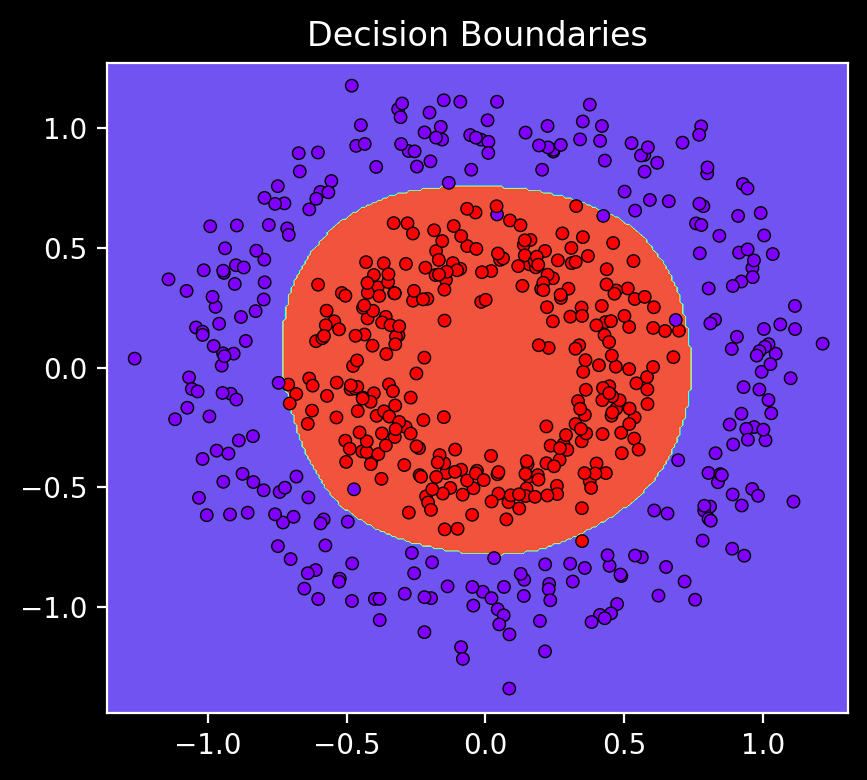

In [13]:
from Plot import plot_model_contours
plot_model_contours(lr, x_train, y_train, trained=True)

Now let's go back and add a hidden layer with 800 neurons or so and see how it performs.

#### Recap
- `torch.nn` encodes neural network operations and their parameters in so called layers

- It also includes a large set of activation and loss functions

- Can design any network by defining the layers then calling them in it's `forward function`

- By including such design in a class inheriting `torch.nn.module` we get free parameter tracking among with other features

Because PyTorch knew you would get sick of defining the calling each layer, they made `nn.sequential`. Can be used if and only if each layer expects a single output and yields a single output.

In [19]:
import torch
import torch.nn as nn

# 1. Define a simple neural network with one hidden layer using nn.Sequential (already wrapped in torch.nn.moduke!)
model = nn.Sequential(
    nn.Linear(784, 128),                    # Input layer (28x28 = 784 pixels)
    nn.ReLU(),                              # Activation function
    nn.Linear(128, 10),                     # Output layer (10 classes for digits 0-9)
    nn.Sigmoid()                            # Output activation function
)

# 2. Generate some random input data
input_data = torch.randn(1, 784)  # Random input tensor of shape (1, 784)

# 3. Forward pass
output = model(input_data)

print("Output probabilities for each class:", output)

Output probabilities for each class: tensor([[0.5412, 0.4915, 0.4879, 0.4761, 0.4990, 0.4847, 0.4350, 0.4767, 0.4052,
         0.4346]], grad_fn=<SigmoidBackward0>)


How about `torch.nn.functional`? It contains functional versions of layers in `torch.nn`; these functional versions don't store state.

In [29]:
import torch
import torch.nn.functional as F

# Analogue of nn.Linear()
x = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
w = torch.tensor([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6]])
b = torch.tensor([0.1, 0.2])

linear_output = F.linear(x, w, b)
print("Linear transformation output:", linear_output, sep="\n")

# Analogue of nn.Sigmoid()
sigmoid_output = F.sigmoid(linear_output)
print("\nSigmoid output:", sigmoid_output, sep="\n")

# Analogue of nn.BCELoss()
target = torch.tensor([[0.0, 1.0],
                       [1.0, 0.0]])
bce_loss = F.binary_cross_entropy(sigmoid_output, target)
print("\nBinary Cross Entropy Loss:", bce_loss, sep="\n")

Linear transformation output:
tensor([[1.5000, 3.4000],
        [3.3000, 7.9000]])

Sigmoid output:
tensor([[0.8176, 0.9677],
        [0.9644, 0.9996]])

Binary Cross Entropy Loss:
tensor(2.4177)


<img width="1200" src="https://i.imgur.com/1leI9h9.png">

Now before we move on to implement some applications, let's talk about loss functions and how that relates to the output layer of the neural network.

1. $\text{For Regression Tasks}$
- Use `nn.MSELoss` or `nn.L1loss` or `nn.HuberLoss`, etc.

- Outpuer layer has one neuron (unless it's multioutput regression)

- Activation at the output is nothing or `nn.ReLU` if target must be positive (should makes no difference)


2. $\text{For Binary Classification Tasks}$
- Think first of `nn.BCELoss` or `nn.BCEWithLogitsLoss`

  - The latter takes `ŷ, y` then applies Sigmoid to `ŷ` then applies loss
  
  - Better numerical stability by algebraic simplification/trick
  
- Output layer has 1 neuron

- Activation at the output is `Sigmoid` or nothing if it will be in loss

   - Predict class $1$ if probability exceeds $0.5$
   

3. $\text{For Multiclass Classification Tasks}$
- Think first of `nn.CrossEntropyLoss`

  - It takes `ŷ, y` then applies Softmax to `ŷ` then applies loss
  
  - For $k$ classes ŷ is of dimensionality $k$
  
  - Better numerical stability by algebraic simplification/trick
  
- Output layer has `k` neurons

- Activation at the output is nothing (but implicitly Softmax)

  - Predict class $i$ if ŷ_i$ is the highest
  

4. $\text{For Multi-Label Classification Tasks}$
- Use `nn.BCELoss` or `nn.BCEWithLogitsLoss`

- Output layer has `k` neurons

- Activation at the output is `Sigmoid` or nothing if it will be in loss

  - Can predict multiple classes (e.g., any class with probability exceeding $0.5$)
  

Cross entropy example

In [70]:
import torch
import torch.nn as nn

# Let's create some sample data
logits = torch.tensor([[2.0, 1.0, -1.0],     # output layer logits for first example
                       [-1.1, 2.1, 3.3]])    # output layer logits for second example

target = torch.tensor([0, 2])               # real classes are 0 and 2

# Using nn.CrossEntropyLoss
cross_entropy_loss = nn.CrossEntropyLoss()(logits, target)

print("Cross Entropy Loss with Integer Labels:", cross_entropy_loss)

Cross Entropy Loss with Integer Labels: tensor(0.3108)
